<a href="https://colab.research.google.com/github/akifkashif/EDA-Capstone-Project---Mohammed-Akifuddin/blob/main/TEAM_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from numpy import math

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Telecom Churn.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df['Area code'].dtype()

TypeError: ignored

In [ ]:
df.describe()


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [ ]:
df["Area code"].unique()

array([415, 408, 510])

In [ ]:
numeric_features = df.describe().columns
numeric_features

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls'],
      dtype='object')

In [ ]:
numeric_features

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls'],
      dtype='object')

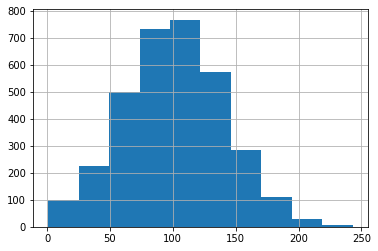

In [ ]:
df["Account length"].hist()

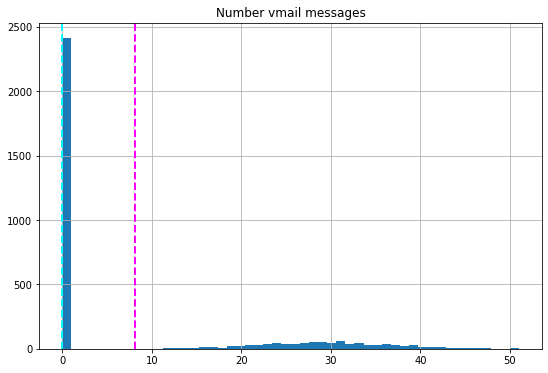

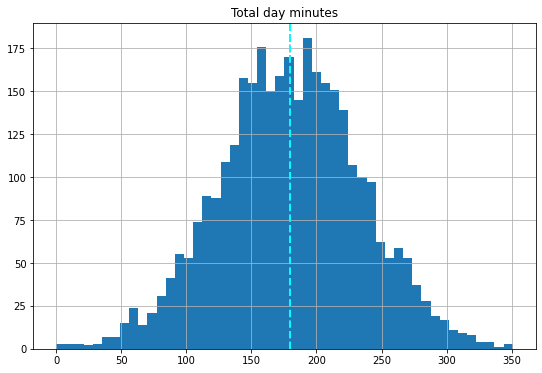

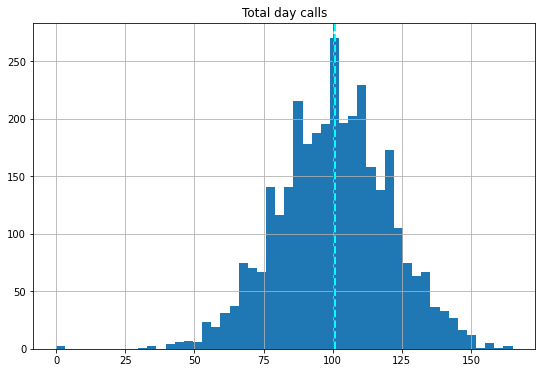

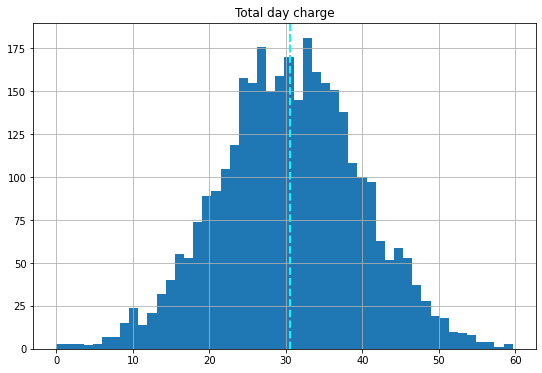

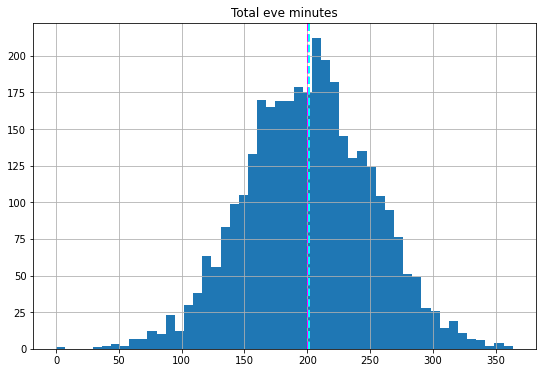

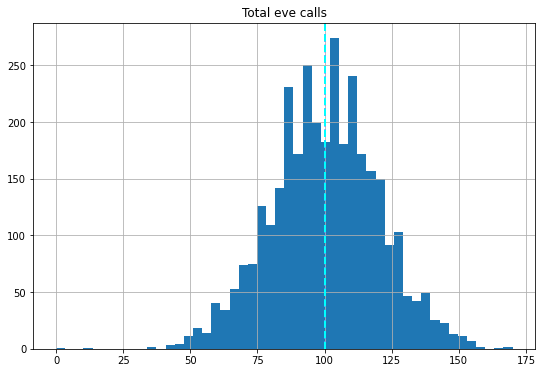

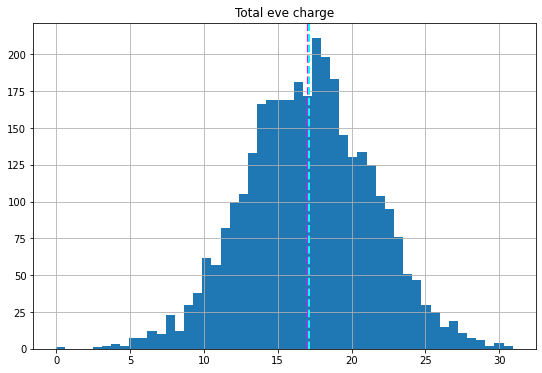

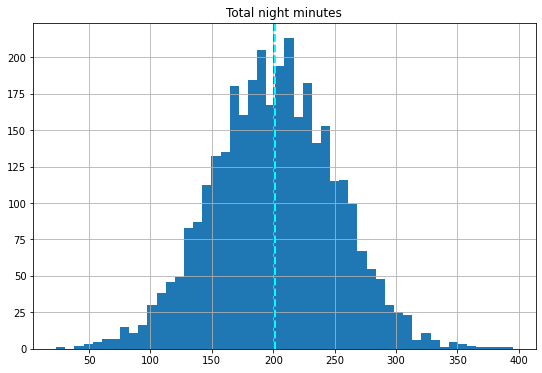

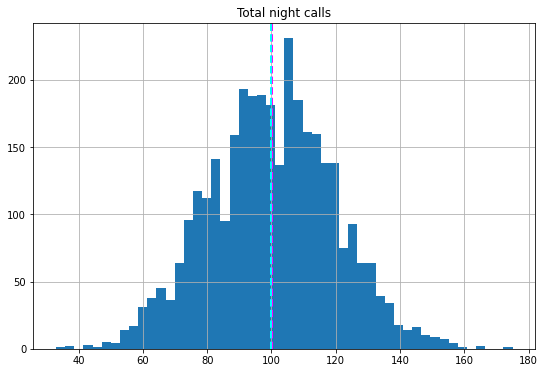

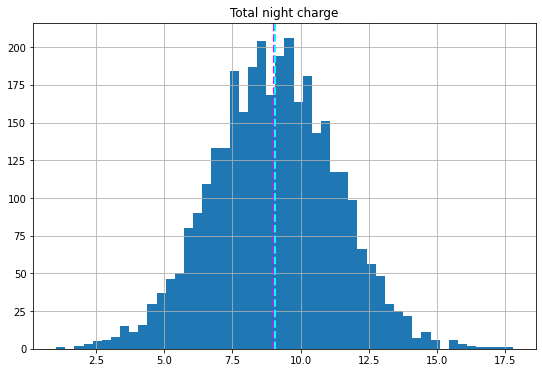

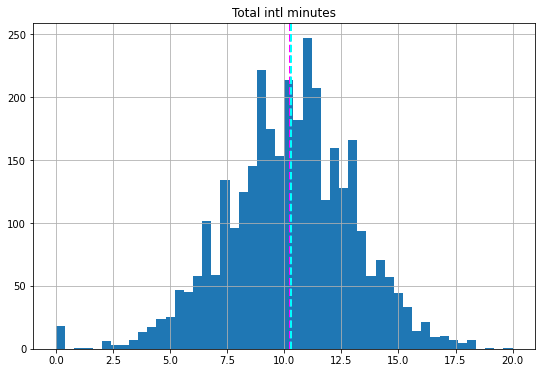

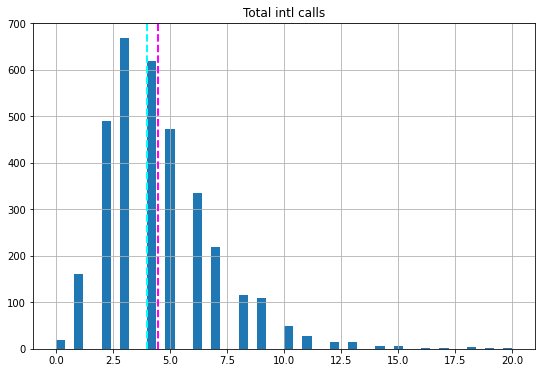

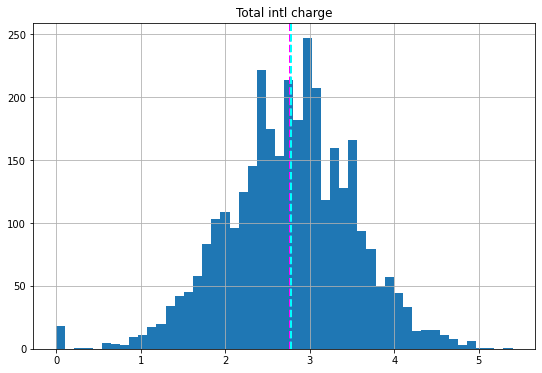

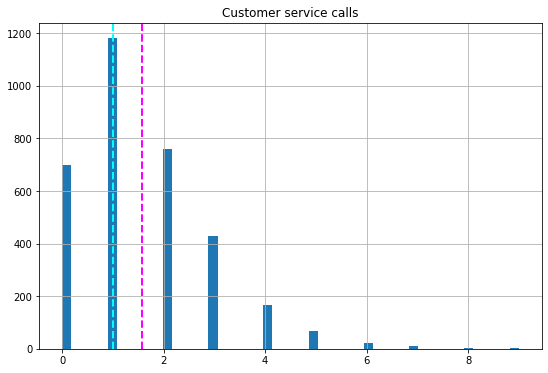

In [ ]:
for col in numeric_features[2:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

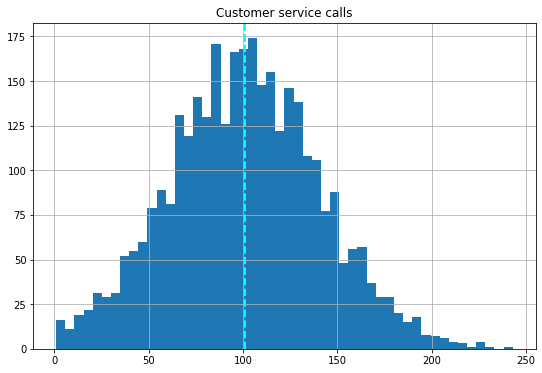

In [ ]:

    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df["Account length"]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [ ]:
# Create dummy variables for the catgeorical variable State
df['Area code_415'] = np.where(df['Area code']== 415, 1, 0)
df['Area code_408'] = np.where(df['Area code']== 408, 1, 0)
df['Area code_510'] = np.where(df['Area code']== 510, 1, 0)

# Drop the original column State from the dataframe
df.drop(columns=['Area code'],axis=1,inplace=True)

In [ ]:
df.head()

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Area code_415,Area code_408,Area code_510
0,KS,128,No,Yes,25,265.1,110,45.07,197.4,99,...,91,11.01,10.0,3,2.70,1,False,1,0,0
1,OH,107,No,Yes,26,161.6,123,27.47,195.5,103,...,103,11.45,13.7,3,3.70,1,False,1,0,0
2,NJ,137,No,No,0,243.4,114,41.38,121.2,110,...,104,7.32,12.2,5,3.29,0,False,1,0,0
3,OH,84,Yes,No,0,299.4,71,50.90,61.9,88,...,89,8.86,6.6,7,1.78,2,False,0,1,0
4,OK,75,Yes,No,0,166.7,113,28.34,148.3,122,...,121,8.41,10.1,3,2.73,3,False,1,0,0


In [ ]:
df1= df.copy()

In [ ]:
df1.head()

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Area code_415,Area code_408,Area code_510
0,KS,128,No,Yes,25,265.1,110,45.07,197.4,99,...,91,11.01,10.0,3,2.70,1,False,1,0,0
1,OH,107,No,Yes,26,161.6,123,27.47,195.5,103,...,103,11.45,13.7,3,3.70,1,False,1,0,0
2,NJ,137,No,No,0,243.4,114,41.38,121.2,110,...,104,7.32,12.2,5,3.29,0,False,1,0,0
3,OH,84,Yes,No,0,299.4,71,50.90,61.9,88,...,89,8.86,6.6,7,1.78,2,False,0,1,0
4,OK,75,Yes,No,0,166.7,113,28.34,148.3,122,...,121,8.41,10.1,3,2.73,3,False,1,0,0


In [ ]:
df1 = pd.get_dummies(
    df1, 
    prefix=None, 
    prefix_sep='_', 
    dummy_na=False, 
    columns=["State" ,'International plan' ,'Voice mail plan', 'Churn' ], 
    sparse=False, 
    drop_first=False, 
    dtype=None,
  
)


In [ ]:
df1.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,...,State_WA,State_WI,State_WV,State_WY,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes,Churn_False,Churn_True
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,1,0,0,1,1,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,1,0,0,1,1,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,1,0,1,0,1,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,1,1,0,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,1,1,0,1,0


In [ ]:
df1

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,...,State_WA,State_WI,State_WV,State_WY,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes,Churn_False,Churn_True
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,1,0,0,1,1,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,1,0,0,1,1,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,1,0,1,0,1,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,1,1,0,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,...,0,0,0,0,1,0,0,1,1,0
3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,...,0,0,1,0,1,0,1,0,1,0
3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,...,0,0,0,0,1,0,1,0,1,0
3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,...,0,0,0,0,0,1,1,0,1,0


In [ ]:
df1. fillna(value=df1. mean(), inplace=True)

In [ ]:
df.isna().sum()

State                     0
Account length            0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
Area code_415             0
Area code_408             0
Area code_510             0
dtype: int64

In [ ]:
df. isnull().sum()

State                     0
Account length            0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
Area code_415             0
Area code_408             0
Area code_510             0
dtype: int64

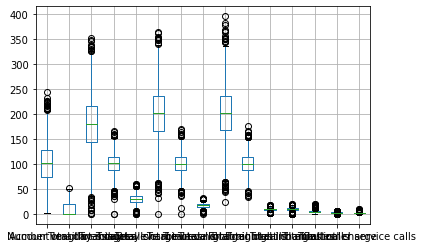

In [ ]:
df1.boxplot(column = (['Account length', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls']))

In [ ]:
df2 =df[df.describe().columns]

In [ ]:
df2.drop(columns=['Area code_415', 'Area code_408','Area code_510'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df2.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


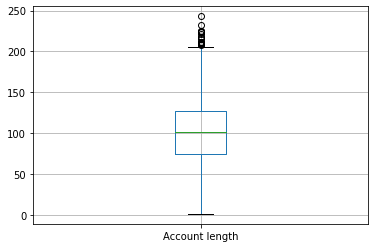

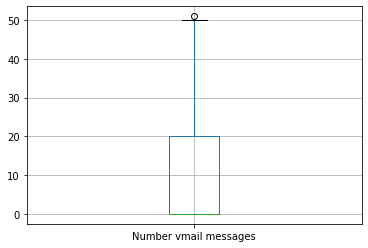

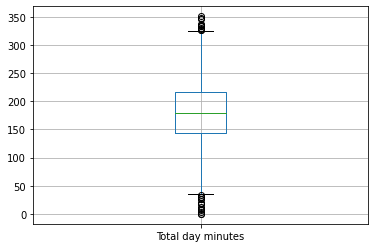

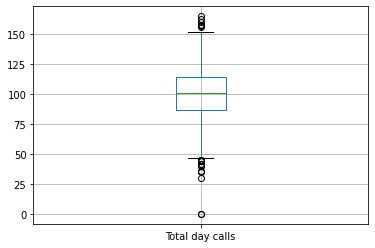

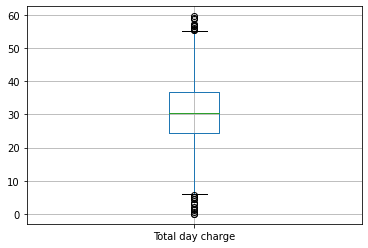

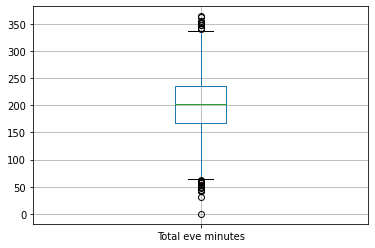

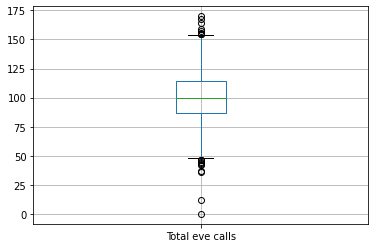

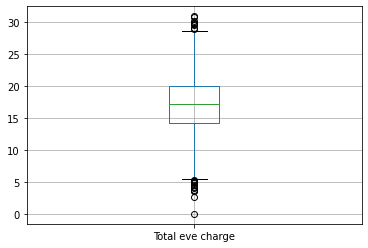

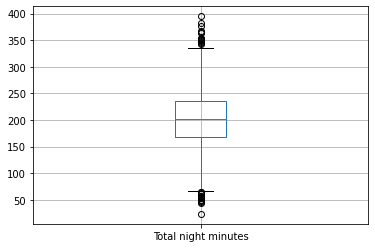

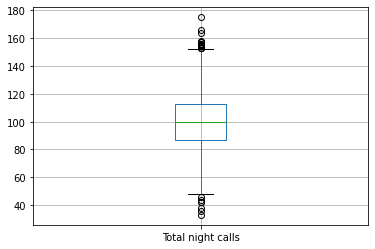

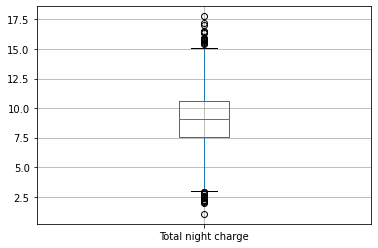

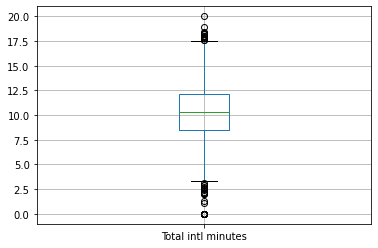

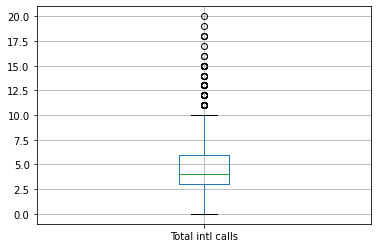

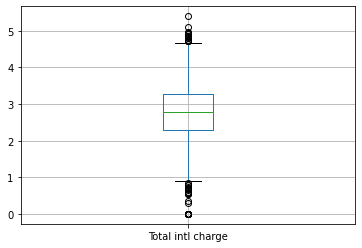

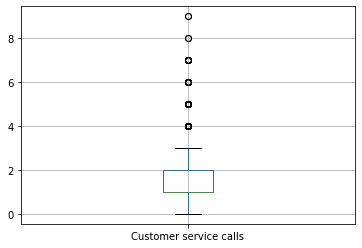

In [ ]:
for column in df2:
    plt.figure()
    df1.boxplot([column])